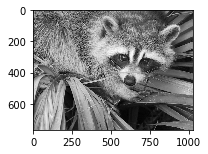

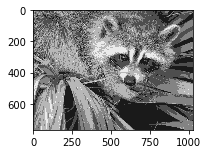

ValueError: Image size of -216x158 pixels is too large. It must be less than 2^16 in each direction.

<Figure size -216x158.4 with 1 Axes>

In [5]:
import numpy as np,scipy as sp,matplotlib.pyplot as plt
from sklearn import cluster as cl

try:
    from scipy.misc import face
    face=face(gray=True)
except ImportError:
    face=sp.face(gray=True)
np.random.seed(0)
X=face.reshape(-1,1)
k_means=cl.KMeans(n_clusters=5,n_init=4)
k_means.fit(X)
val=k_means.cluster_centers_.squeeze()
lab=k_means.labels_
face_cmps=np.choose(lab,val)
face_cmps.shape=face.shape

vmin=face.min()
vmax=face.max()

plt.figure(1,figsize=(3,2.2))
plt.imshow(face,cmap=plt.cm.gray,vmin=vmin,vmax=vmax)
rv=np.linspace(0,256,6)
rl=np.searchsorted(rv,face)-1
rv=.5*(rv[1:]+rv[:-1])
rf=np.choose(rl.ravel(),rv,mode='clip')
rf.shape=face.shape
plt.figure(3,figsize=(3,2.2))
plt.imshow(rf,cmap=plt.cm.gray,vmin=vmin,vmax=vmax)
plt.figure(4,figsize=(-3,2.2))
plt.clf()
plt.axes([.01,.01,.98,.98])
plt.hist(X,bins=256,color='.5',edgecolor='.5')
plt.xticks(rv);plt.yticks(())
val=np.sort(val)
for c1,c2 in zip(rv[:-1],rv[1:]):
    plt.axvline(.5*(c1+c2),color='b',ls='--')
plt.show()